In [19]:
import numpy as np
import os
import matplotlib.pyplot as plt 
from keras.utils import np_utils  

In [20]:
def load_mnist(path, kind='train'):

    labels_path = str(path+'/{}-labels.idx1-ubyte'.format(kind))
    images_path = str(path+'/{}-images.idx3-ubyte'.format(kind))

    with open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)
    
    with open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)
        
    return images, labels

In [21]:
# show the number image
def plot_image(image):  
    fig = plt.gcf()  
    fig.set_size_inches(2,2)  
    plt.imshow(image, cmap='binary')
    plt.show()  

In [22]:
# show the image and the label
def plot_images_labels_predict(images, labels, prediction, idx, num=10):  
    fig = plt.gcf()  
    fig.set_size_inches(12, 14)  
    if num > 25: num = 25  
    for i in range(0, num):  
        ax=plt.subplot(5,5, 1+i)  
        ax.imshow(images[idx], cmap='binary')  
 
        if len(prediction) > 0:  
            title = "l={},p={}".format(str(labels[idx]), str(prediction[idx]))  
        else:  
            title = "l={}".format(str(labels[idx]))  
        ax.set_title(title, fontsize=10)  
        ax.set_xticks([]); ax.set_yticks([])  
        idx+=1  
    plt.show()  

In [23]:
# read the data in the path
datapath = "D:/Program/dataset/MNIST dataset"
X_train, Y_train = load_mnist(path=datapath)
X_test, Y_test = load_mnist(path=datapath, kind="t10k")

# reshape data to number of data * pixel28*28
X_train = X_train.reshape(X_train.shape[0], 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28).astype('float32')

print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


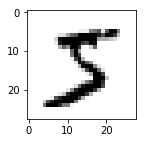

In [24]:
plot_image(X_train[0])

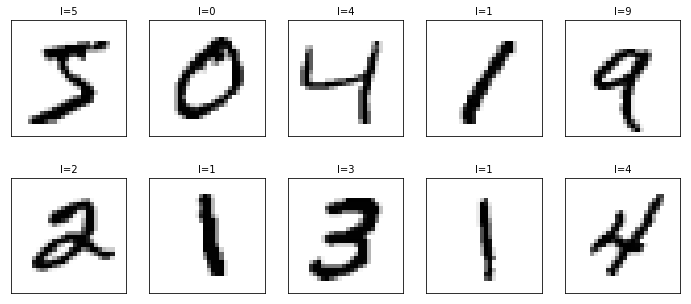

In [25]:
plot_images_labels_predict(X_train, Y_train, [], 0, 10)

In [26]:
# Data pre-processing
# Normalization  
X_train_norm = X_train.reshape(X_train.shape[0], 28*28)/255
X_test_norm = X_test.reshape(X_test.shape[0], 28*28)/255

# Label Onehot encoding  
Y_trainOneHot = np_utils.to_categorical(Y_train)
Y_testOneHot = np_utils.to_categorical(Y_test)

In [27]:
from keras.models import Sequential  
from keras.layers import Dense

model = Sequential() 
model.add(Dense(units=1000,input_shape=(28*28,),activation="relu",name="hidden"))
model.add(Dense(units=1000,activation="relu",name="hidden2"))
model.add(Dense(units=10,activation="softmax",name="output"))
model.summary() 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 1000)              785000    
_________________________________________________________________
hidden2 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
output (Dense)               (None, 10)                10010     
Total params: 1,796,010
Trainable params: 1,796,010
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

In [29]:
train_history = model.fit(X_train_norm, Y_trainOneHot, validation_split=0.2, epochs=10, batch_size=200, verbose=1) 

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 3s - loss: 0.2385 - acc: 0.9309 - val_loss: 0.1210 - val_acc: 0.9619
Epoch 2/10
48000/48000 [==============================] - 2s - loss: 0.0788 - acc: 0.9758 - val_loss: 0.0928 - val_acc: 0.9718
Epoch 3/10
48000/48000 [==============================] - 2s - loss: 0.0509 - acc: 0.9837 - val_loss: 0.0811 - val_acc: 0.9753
Epoch 4/10
48000/48000 [==============================] - 2s - loss: 0.0317 - acc: 0.9899 - val_loss: 0.0935 - val_acc: 0.9734
Epoch 5/10
48000/48000 [==============================] - 2s - loss: 0.0222 - acc: 0.9929 - val_loss: 0.0883 - val_acc: 0.9758
Epoch 6/10
48000/48000 [==============================] - 2s - loss: 0.0215 - acc: 0.9924 - val_loss: 0.0915 - val_acc: 0.9752
Epoch 7/10
48000/48000 [==============================] - 2s - loss: 0.0174 - acc: 0.9941 - val_loss: 0.0883 - val_acc: 0.9781
Epoch 8/10
48000/48000 [==============================] - 2s 

In [30]:
import matplotlib.pyplot as plt  
def show_train_history(train_history, train, validation):  
    plt.plot(train_history.history[train])  
    plt.plot(train_history.history[validation])  
    plt.title('Train History')  
    plt.ylabel(train)  
    plt.xlabel('Epoch')  
    plt.legend(['train', 'validation'], loc='upper left')  
    plt.show()  

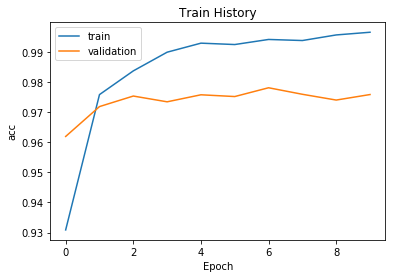

In [31]:
show_train_history(train_history, 'acc', 'val_acc')  

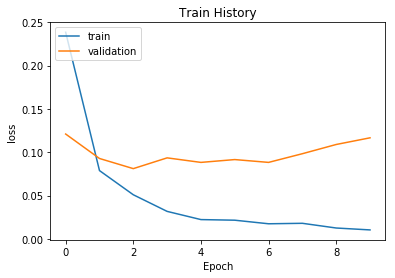

In [32]:
show_train_history(train_history, 'loss', 'val_loss')  

In [33]:
scores = model.evaluate(X_test_norm, Y_testOneHot)  
print()
print(scores)

 9984/10000 [============================>.] - ETA: 0s
[0.095273455412748814, 0.97809999999999997]


In [34]:
prediction = model.predict_classes(X_test_norm)
print()
print("Show 10 prediction result :")  
print(prediction[:10])

 9472/10000 [===========================>..] - ETA: 0s
Show 10 prediction result :
[7 2 1 0 4 1 4 9 6 9]


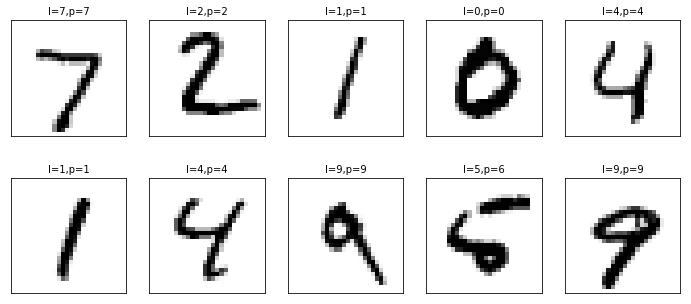

In [35]:
plot_images_labels_predict(X_test, Y_test, prediction, 0)

In [36]:
import pandas as pd  
print("Display Confusion Matrix:")  
print(pd.crosstab(Y_test, prediction, rownames=['label'], colnames=['predict']))  

Display Confusion Matrix:
predict    0     1     2    3    4    5    6    7    8    9
label                                                      
0        975     1     1    0    0    1    1    0    0    1
1          0  1133     0    0    0    1    1    0    0    0
2          4     3  1017    0    2    0    0    2    3    1
3          0     1     7  974    0   11    0    4    5    8
4          1     1     2    1  963    0    2    1    1   10
5          3     0     0    1    1  878    5    0    2    2
6          6     2     1    0    3    2  944    0    0    0
7          1    17    19    2    1    0    0  983    1    4
8          8     2     6    3    3    7    3    4  936    2
9          3    12     0    3    5    5    0    0    3  978
